In [2]:
from IPython.display import display, Markdown, Latex
from string import Template
import datetime
import requests
import json
import io

import networkx as nx
from nxpd import draw

from rdflib import Graph, RDF, RDFS, Namespace

def serialize():
    print(g.serialize(format='turtle'))

def save(filename):
    with open(filename, 'w') as f:
        g.serialize(f, format='turtle')
        
def load(filename):
    with io.open(filename,'r',encoding='utf8') as f:
        g.load(f, format='turtle')  

g = Graph()
g.bind('prov',Namespace('http://www.w3.org/ns/prov#'))
g.bind('p-plan',Namespace('http://purl.org/net/p-plan#'))
g.bind('mp',Namespace('http://purl.org/mp/'))

# Input RDF data loading -> Knowledge Graph
   - the workflow run as a provenance graph (PROV-O)
   - a dump of the bio.tools registry
   - the EDAM ontology

In [3]:
%%time
experiment = """
@prefix mp:  <http://purl.org/mp/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

_:mp1 rdf:type mp:Micropublication ;
    mp:argues _:claim1 .

_:claim1 rdf:type mp:Claim ;
    mp:statement "Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm" .
"""
g.parse(data=experiment, format='turtle')

load('provenance.ttl')
print('provenance.ttl loaded')

load('biotools-dump-latest.ttl')
print('biotools-dump-latest.ttl loaded')

with io.open('EDAM.owl','r',encoding='utf8') as f:
        g.load(f, format='xml')
print('edam.owl loaded')

print('Graph size: %s triples' % len(g))

provenance.ttl loaded
biotools-dump-latest.ttl loaded
edam.owl loaded
Graph size: 203171 triples
CPU times: user 22.8 s, sys: 175 ms, total: 22.9 s
Wall time: 23.2 s


# Domain augmented provenance for  humans and machines

## Sentence-based data explanations  
Here, the goal is to describe a piece of data with the consensual definition of **what** does the tool that generates this piece of data.  
Technically, this is done with a SPARQL query that combine the provenance information, the description of the tool, and the domain knowledge on the nature of the processing. 

In [4]:
%%time
query = """
    SELECT ?d_label ?title ?f_def ?st WHERE {
        ?d rdf:type prov:Entity ;
           prov:wasGeneratedBy ?x ;
           prov:wasAssociatedWith ?tool ;
           rdfs:label ?d_label .
        
        ?tool dc:title ?title ;
            biotools:has_function ?f .
            
        ?f rdfs:label ?f_label ;
            oboInOwl:hasDefinition ?f_def .
            
        ?c rdf:type mp:Claim ;    
            mp:statement ?st .
    }
"""

results = g.query(query)
for r in results :
    display(Markdown('The file `' + str(r['d_label']) + '`'
                     +' **results from tool** ' + str(r['title']) 
                     + ' **which** ' + str(r['f_def'])))
    display(Markdown(' **It was produced in the context of** ' + str(r['st']) ))


The file `Samples/Sample1/BAM/Sample1.p1.sorted.bam` **results from tool** samtools_sort-IP **which** Reformat a file of data (or equivalent entity in memory).

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.recal.combined.annot.gnomad.vcf.gz` **results from tool** gatk2_variant_annotator-IP **which** Predict the effect or function of an individual single nucleotide polymorphism (SNP).

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `Samples/Sample1/BAM/Sample1.p1.aligned.sam` **results from tool** BWA (cloudIFB) **which** Construct some data entity.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `Samples/Sample1/BAM/Sample1.p1.aligned.sam` **results from tool** BWA (cloudIFB) **which** Align (identify equivalent sites within) molecular sequences.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `Samples/Sample1/BAM/Sample1.p1.aligned.sam` **results from tool** BWA (cloudIFB) **which** Generate an index of a genome sequence.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `Samples/Sample1/BAM/Sample1.p1.aligned.sam` **results from tool** BWA (cloudIFB) **which** Align short oligonucleotide sequences (reads) to a larger (genomic) sequence.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.combined.g.vcf.gz.tbi` **results from tool** gatk2_variant_combine-IP **which** Merge two or more (typically overlapping) molecular sequences.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.snv.recal.select.vcf.gz.tbi` **results from tool** gatk2_variant_select-IP **which** Identify and map genomic alterations, including single nucleotide polymorphisms, short indels and structural variants, in a genome sequence.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `Samples/Sample1/QC/Sample1.markdup.metrics` **results from tool** MarkDuplicates (IP) **which** Predict, recognise and identify positional features in molecular sequences such as key functional sites or regions.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.indel.recal.select.vcf.gz` **results from tool** gatk2_variant_select-IP **which** Identify and map genomic alterations, including single nucleotide polymorphisms, short indels and structural variants, in a genome sequence.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.combined.g.vcf.gz` **results from tool** gatk2_variant_combine-IP **which** Merge two or more (typically overlapping) molecular sequences.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.recal.combined.vcf.gz` **results from tool** gatk2_variant_combine-IP **which** Merge two or more (typically overlapping) molecular sequences.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `BED/capture.extended1000.bed` **results from tool** bedtools_mergebedgraph-IP **which** Merge two or more (typically overlapping) molecular sequences.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.genotyped.vcf.gz` **results from tool** gatk2_unified_genotyper-IP **which** Identify and map genomic alterations, including single nucleotide polymorphisms, short indels and structural variants, in a genome sequence.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.genotyped.vcf.gz` **results from tool** gatk2_unified_genotyper-IP **which** Identify insertion, deletion and duplication events from a sequence alignment.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.recal.combined.vcf.gz.tbi` **results from tool** gatk2_variant_combine-IP **which** Merge two or more (typically overlapping) molecular sequences.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `Samples/Sample1/BAM/Sample1.final.bai` **results from tool** gatk2_print_reads-IP **which** Counting and summarising the number of short sequence reads that map to genomic features.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `Samples/Sample1/BAM/Sample1.final.bam` **results from tool** gatk2_print_reads-IP **which** Counting and summarising the number of short sequence reads that map to genomic features.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.indel.recal.select.vcf.gz.tbi` **results from tool** gatk2_variant_select-IP **which** Identify and map genomic alterations, including single nucleotide polymorphisms, short indels and structural variants, in a genome sequence.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `BED/capture.bed` **results from tool** bedtools_mergebedgraph-IP **which** Merge two or more (typically overlapping) molecular sequences.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.indel.recal.filter.vcf.gz` **results from tool** gatk2_variant_filtration-IP **which** Filter a set of files or data items according to some property.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.indel.recal.filter.vcf.gz` **results from tool** gatk2_variant_filtration-IP **which** Analyse a genetic variation, for example to annotate its location, alleles, classification, and effects on individual transcripts predicted for a gene model.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.snv.recal.filter.vcf.gz.tbi` **results from tool** gatk2_variant_filtration-IP **which** Filter a set of files or data items according to some property.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.snv.recal.filter.vcf.gz.tbi` **results from tool** gatk2_variant_filtration-IP **which** Analyse a genetic variation, for example to annotate its location, alleles, classification, and effects on individual transcripts predicted for a gene model.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.snv.recal.select.vcf.gz` **results from tool** gatk2_variant_select-IP **which** Identify and map genomic alterations, including single nucleotide polymorphisms, short indels and structural variants, in a genome sequence.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `Samples/Sample1/BAM/Sample1.realign.bam` **results from tool** gatk2_indel_realigner-IP **which** Locally align two or more molecular sequences.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `Samples/Sample1/VCF/Sample1.hapcaller.g.vcf.idx` **results from tool** gatk2_haplotype_caller-IP **which** Identify and map genomic alterations, including single nucleotide polymorphisms, short indels and structural variants, in a genome sequence.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `Samples/Sample1/BAM/Sample1.realign.bai` **results from tool** gatk2_indel_realigner-IP **which** Locally align two or more molecular sequences.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.snv.recal.filter.vcf.gz` **results from tool** gatk2_variant_filtration-IP **which** Filter a set of files or data items according to some property.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.snv.recal.filter.vcf.gz` **results from tool** gatk2_variant_filtration-IP **which** Analyse a genetic variation, for example to annotate its location, alleles, classification, and effects on individual transcripts predicted for a gene model.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `Samples/Sample1/BAM/Sample1.merged.bam` **results from tool** Picard **which** Analyse a genetic variation, for example to annotate its location, alleles, classification, and effects on individual transcripts predicted for a gene model.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `Samples/Sample1/BAM/Sample1.merged.bai` **results from tool** Picard **which** Analyse a genetic variation, for example to annotate its location, alleles, classification, and effects on individual transcripts predicted for a gene model.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `Samples/Sample1/BAM/Sample1.recal.table` **results from tool** gatk2_base_recalibrator-IP **which** Analyse one or more known molecular sequences.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.genotyped.vcf.gz.tbi` **results from tool** gatk2_unified_genotyper-IP **which** Identify and map genomic alterations, including single nucleotide polymorphisms, short indels and structural variants, in a genome sequence.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.genotyped.vcf.gz.tbi` **results from tool** gatk2_unified_genotyper-IP **which** Identify insertion, deletion and duplication events from a sequence alignment.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `Samples/Sample1/BAM/Sample1.markdup.bam` **results from tool** MarkDuplicates (IP) **which** Predict, recognise and identify positional features in molecular sequences such as key functional sites or regions.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `Samples/Sample1/BAM/Sample1.realign.intervals` **results from tool** gatk2_realigner_target_creator-IP **which** Locally align two or more molecular sequences.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `Samples/Sample1/VCF/Sample1.hapcaller.g.vcf` **results from tool** gatk2_haplotype_caller-IP **which** Identify and map genomic alterations, including single nucleotide polymorphisms, short indels and structural variants, in a genome sequence.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `Samples/Sample1/BAM/Sample1.markdup.bai` **results from tool** MarkDuplicates (IP) **which** Predict, recognise and identify positional features in molecular sequences such as key functional sites or regions.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.recal.combined.annot.gnomad.vcf.gz.tbi` **results from tool** gatk2_variant_annotator-IP **which** Predict the effect or function of an individual single nucleotide polymorphism (SNP).

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.indel.recal.filter.vcf.gz.tbi` **results from tool** gatk2_variant_filtration-IP **which** Filter a set of files or data items according to some property.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

The file `VCF/hapcaller.indel.recal.filter.vcf.gz.tbi` **results from tool** gatk2_variant_filtration-IP **which** Analyse a genetic variation, for example to annotate its location, alleles, classification, and effects on individual transcripts predicted for a gene model.

 **It was produced in the context of** Rare Coding Variants in ANGPTL6 Are Associated with Familial Forms of Intracranial Aneurysm

CPU times: user 1.71 s, sys: 58.2 ms, total: 1.77 s
Wall time: 1.8 s


In [5]:
%%time
my_ORCID = "0000-0002-3597-8557"

data_assertions = []

np_data_query = """
    CONSTRUCT {
        ?d rdfs:seeAlso ?f .
        ?d rdfs:comment ?f_def .
    } WHERE {
        ?d rdf:type prov:Entity ;
           prov:wasGeneratedBy ?x ;
           prov:wasAssociatedWith ?tool ;
           rdfs:label ?d_label .
        
        ?tool dc:title ?title ;
            biotools:has_function ?f .
            
        ?f rdfs:label ?f_label ;
            oboInOwl:hasDefinition ?f_def .
    }
"""

results = g.query(np_data_query)
for r in results :
    data_assertions.append('<'+str(r[0])+'>' " " + '<'+str(r[1])+'>' + " " + '<'+str(r[2])+'> .')


nanopub_template = """

@prefix : <http://example.org/pub1#> .
@prefix ex: <http://example.org/> .
@prefix np:  <http://www.nanopub.org/nschema#> .
@prefix prov: <http://www.w3.org/ns/prov#> . 
@prefix xsd:  <http://www.w3.org/2001/XMLSchema#> .

:head {
    ex:pub1 a np:Nanopublication .
    ex:pub1 np:hasAssertion :assertion .
    ex:pub1 np:hasProvenance :provenance .
    ex:pub1 np:hasPublicationInfo :pubInfo .
}

:assertion {
    $Assertion
}

:provenance {
    :assertion prov:generatedAtTime \""""+datetime.datetime.now().isoformat()+"""\"^^xsd:dateTime .
    :assertion prov:wasDerivedFrom :experiment .
    :assertion prov:wasAttributedTo <https://orcid.org/"""+my_ORCID+"""> .
}

:pubInfo {
    ex:pub1 prov:wasAttributedTo <https://orcid.org/"""+my_ORCID+"""> .
}

"""

assert_graph = ('\n\t').join(data_assertions)

np = Template(nanopub_template)
np = np.substitute(Assertion = assert_graph)

print(np)



@prefix : <http://example.org/pub1#> .
@prefix ex: <http://example.org/> .
@prefix np:  <http://www.nanopub.org/nschema#> .
@prefix prov: <http://www.w3.org/ns/prov#> . 
@prefix xsd:  <http://www.w3.org/2001/XMLSchema#> .

:head {
    ex:pub1 a np:Nanopublication .
    ex:pub1 np:hasAssertion :assertion .
    ex:pub1 np:hasProvenance :provenance .
    ex:pub1 np:hasPublicationInfo :pubInfo .
}

:assertion {
    <http://snakemake-provenance/VCF/hapcaller.snv.recal.filter.vcf.gz> <http://www.w3.org/2000/01/rdf-schema#seeAlso> <http://edamontology.org/operation_3197> .
	<http://snakemake-provenance/VCF/hapcaller.recal.combined.vcf.gz> <http://www.w3.org/2000/01/rdf-schema#comment> <Merge two or more (typically overlapping) molecular sequences.> .
	<http://snakemake-provenance/VCF/hapcaller.genotyped.vcf.gz.tbi> <http://www.w3.org/2000/01/rdf-schema#comment> <Identify and map genomic alterations, including single nucleotide polymorphisms, short indels and structural variants, in a genome

## Summary graph of  the main processing steps
Here, the goal is to display a graph of domain-specific terms, describing the workflow processing steps. 

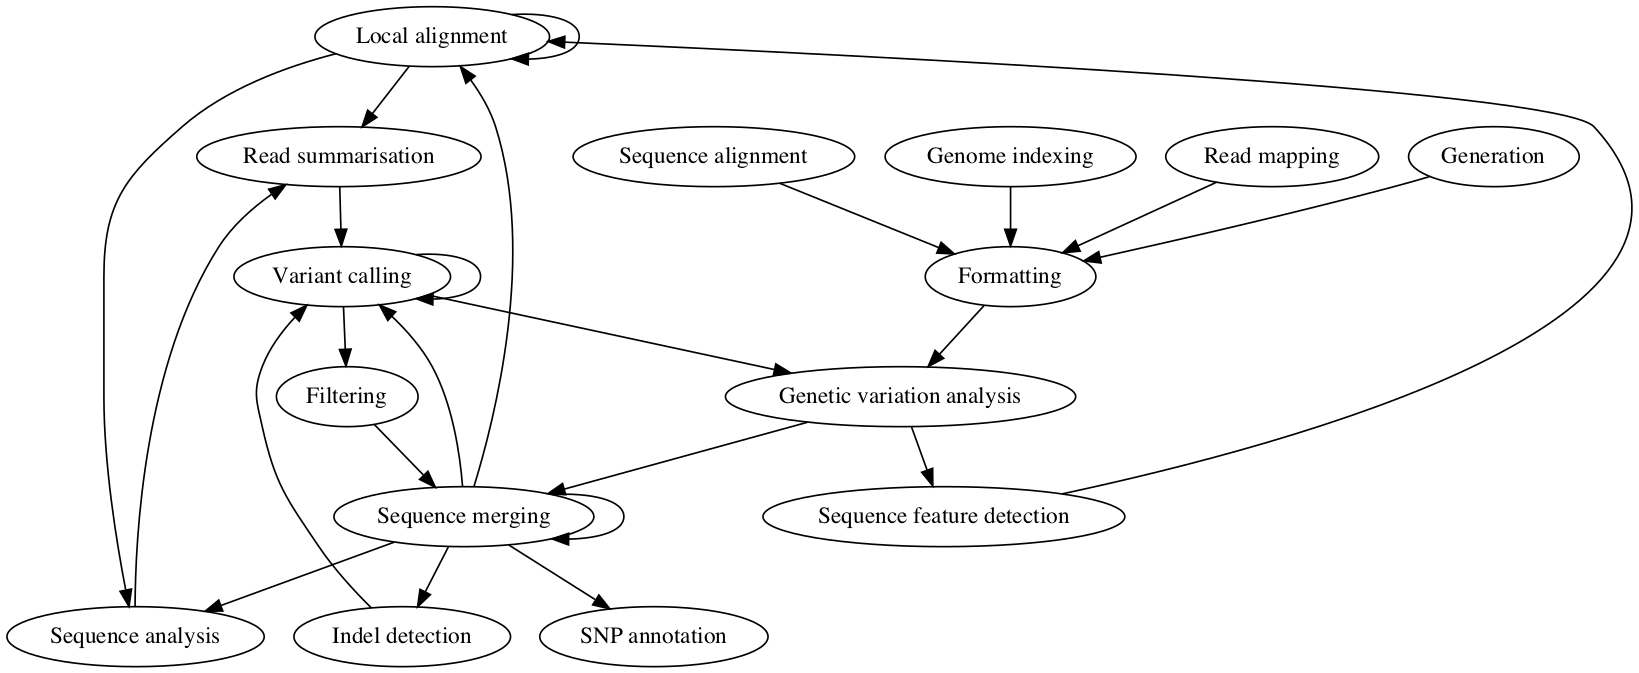

In [6]:
edges = []

query = """
    CONSTRUCT {
        ?x2 p-plan:wasPreceededBy ?x1 .
        ?x2 prov:wasAssociatedWith ?t2 .
        ?x1 prov:wasAssociatedWith ?t1 .
        ?t1 biotools:has_function ?f1 .
        ?f1 rdfs:label ?f1_label .
        ?t2 biotools:has_function ?f2 .
        ?f2 rdfs:label ?f2_label .
    } WHERE {
        ?d2 prov:wasDerivedFrom ?d1 .
        
        ?d2 prov:wasGeneratedBy ?x2 ;
           prov:wasAssociatedWith ?t2 ;
           rdfs:label ?d2_label .
        
        ?d1 prov:wasGeneratedBy ?x1 ;
           prov:wasAssociatedWith ?t1 ;
           rdfs:label ?d1_label .
        
        ?t1 biotools:has_function ?f1 .
        ?f1 rdfs:label ?f1_label .
        
        ?t2 biotools:has_function ?f2 .
        ?f2 rdfs:label ?f2_label .
    }
"""

abstract_wf = Graph()
abstract_wf.bind('prov',Namespace('http://www.w3.org/ns/prov#'))
abstract_wf.bind('p-plan',Namespace('http://purl.org/net/p-plan#'))
abstract_wf.bind('biotools',Namespace('https://bio.tools/ontology/'))

results = g.query(query)
for r in results :
    abstract_wf.add(r)

abstract_wf.serialize(destination='abstract_wf.ttl', format='turtle')

vis_query = """
    SELECT ?f1_label ?f2_label WHERE {
        ?x2 p-plan:wasPreceededBy ?x1 .
        ?x2 prov:wasAssociatedWith ?t2 .
        ?x1 prov:wasAssociatedWith ?t1 .
        ?t1 biotools:has_function ?f1 .
        ?f1 rdfs:label ?f1_label .
        ?t2 biotools:has_function ?f2 .
        ?f2 rdfs:label ?f2_label .
    }
"""

results = abstract_wf.query(vis_query)
for r in results :
    edges.append((r['f1_label'], r['f2_label']))

G = nx.DiGraph()
G.graph['dpi'] = 120
G.graph['layout'] = 'dot'
G.add_edges_from(edges)
draw(G, show='ipynb')

# Domain augmented provenance for machines : NanoPublications

In [6]:
my_ORCID = "0000-0002-3597-8557"

wf_assertions = []

np_wf_query = """
    CONSTRUCT {
        ?x2 p-plan:wasPreceededBy ?x1 .
        ?x2 rdf:type p-plan:Step ;
            biotools:has_function ?f2 ; 
            rdfs:seeAlso ?t2 .
        ?x1 rdf:type p-plan:Step ;
            biotools:has_function ?f1 ; 
            rdfs:seeAlso ?t1 .
    } WHERE {
        ?x2 p-plan:wasPreceededBy ?x1 .
        ?x2 prov:wasAssociatedWith ?t2 .
        ?x1 prov:wasAssociatedWith ?t1 .
        ?t1 biotools:has_function ?f1 .
        ?f1 rdfs:label ?f1_label .
        ?t2 biotools:has_function ?f2 .
        ?f2 rdfs:label ?f2_label .
    }
"""

results = abstract_wf.query(np_wf_query)
for r in results :
    wf_assertions.append('<'+str(r[0])+'>' " " + '<'+str(r[1])+'>' + " " + '<'+str(r[2])+'> .')


nanopub_template = """

@prefix : <http://example.org/pub1#> .
@prefix ex: <http://example.org/> .
@prefix np:  <http://www.nanopub.org/nschema#> .
@prefix prov: <http://www.w3.org/ns/prov#> . 
@prefix xsd:  <http://www.w3.org/2001/XMLSchema#> .

:head {
    ex:pub1 a np:Nanopublication .
    ex:pub1 np:hasAssertion :assertion .
    ex:pub1 np:hasProvenance :provenance .
    ex:pub1 np:hasPublicationInfo :pubInfo .
}

:assertion {
    $Assertion
}

:provenance {
    :assertion prov:generatedAtTime \""""+datetime.datetime.now().isoformat()+"""\"^^xsd:dateTime .
    :assertion prov:wasDerivedFrom :experiment .
    :assertion prov:wasAttributedTo <https://orcid.org/"""+my_ORCID+"""> .
}

:pubInfo {
    ex:pub1 prov:wasAttributedTo <https://orcid.org/"""+my_ORCID+"""> .
}

"""

assert_graph = ('\n\t').join(wf_assertions)

np = Template(nanopub_template)
np = np.substitute(Assertion = assert_graph)

print(np)



@prefix : <http://example.org/pub1#> .
@prefix ex: <http://example.org/> .
@prefix np:  <http://www.nanopub.org/nschema#> .
@prefix prov: <http://www.w3.org/ns/prov#> . 
@prefix xsd:  <http://www.w3.org/2001/XMLSchema#> .

:head {
    ex:pub1 a np:Nanopublication .
    ex:pub1 np:hasAssertion :assertion .
    ex:pub1 np:hasProvenance :provenance .
    ex:pub1 np:hasPublicationInfo :pubInfo .
}

:assertion {
    <http://snakemake-provenance#activity-fcd2483e-6a4a-4c25-ac62-da88da13480e> <http://www.w3.org/2000/01/rdf-schema#seeAlso> <https://bio.tools/gatk2_variant_annotator-ip> .
	<http://snakemake-provenance#activity-fcd2483e-6a4a-4c25-ac62-da88da13480e> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://purl.org/net/p-plan#Step> .
	<http://snakemake-provenance#activity-133b295b-41ad-40d1-be31-3d9f1821e220> <http://purl.org/net/p-plan#wasPreceededBy> <http://snakemake-provenance#activity-91c40a1e-45f0-47c2-a19d-3e6d47d993ed> .
	<http://snakemake-provenance#activity-7a09a3bb-e

# TODO : from a single piece of data, show its history in terms of domain-specific data processing 
## 1. sentence-based DS
## 2. diagram-based DS
## 3. machine-oriented DS

In [7]:
#DeductiveClosure(RDFS_Semantics).expand(g)
#print('Graph size: %s triples' % len(g))

## I'm interested in this BAM files. Can I reuse it ? Which reference genome ? Which kind of alignment algorithm ? 

In [8]:
filename_pattern = ".vcf"

query = """
    SELECT ?d ?d_label WHERE {
        ?d rdf:type prov:Entity ;
           prov:wasGeneratedBy ?x ;
           prov:wasAssociatedWith ?tool ;
           rdfs:label ?d_label .
        FILTER (regex(?d_label, \"""" + filename_pattern + """\", "i")) .
    }
"""
print(query)

results = g.query(query)
for r in results :
    display(Markdown('File `' + str(r['d_label']) + '`'))


    SELECT ?d ?d_label WHERE {
        ?d rdf:type prov:Entity ;
           prov:wasGeneratedBy ?x ;
           prov:wasAssociatedWith ?tool ;
           rdfs:label ?d_label .
        FILTER (regex(?d_label, ".vcf", "i")) .
    }



File `VCF/hapcaller.snv.recal.select.vcf.gz`

File `VCF/hapcaller.recal.combined.vcf.gz.tbi`

File `VCF/hapcaller.snv.recal.filter.vcf.gz.tbi`

File `Samples/Sample1/VCF/Sample1.hapcaller.g.vcf.idx`

File `VCF/gvcf.list`

File `VCF/hapcaller.genotyped.vcf.gz.tbi`

File `VCF/hapcaller.indel.recal.select.vcf.gz.tbi`

File `VCF/hapcaller.snv.recal.select.vcf.gz.tbi`

File `VCF/hapcaller.combined.g.vcf.gz`

File `Samples/Sample1/VCF/Sample1.hapcaller.g.vcf`

File `VCF/hapcaller.indel.recal.filter.vcf.gz.tbi`

File `VCF/hapcaller.indel.recal.select.vcf.gz`

File `VCF/hapcaller.snv.recal.filter.vcf.gz`

File `VCF/hapcaller.indel.recal.filter.vcf.gz`

File `VCF/hapcaller.recal.combined.annot.gnomad.vcf.gz`

File `VCF/hapcaller.genotyped.vcf.gz`

File `VCF/hapcaller.recal.combined.annot.gnomad.vcf.gz.tbi`

File `VCF/hapcaller.recal.combined.vcf.gz`

File `VCF/hapcaller.combined.g.vcf.gz.tbi`

In [9]:
%%time
pattern_intermediate = "Sample1.final.bam"
pattern_final = "hapcaller.recal.combined.annot.gnomad.vcf.gz"

query = """
    CONSTRUCT {
        ?x2 p-plan:wasPreceededBy ?x1 .
        ?x2 prov:wasAssociatedWith ?t2 .
        ?x1 prov:wasAssociatedWith ?t1 .
        ?t1 biotools:has_function ?f1 .
        ?f1 rdfs:label ?f1_label .
        ?t2 biotools:has_function ?f2 .
        ?f2 rdfs:label ?f2_label .
        
        ?d rdf:type prov:Entity ;
               prov:wasGeneratedBy ?x ;
               prov:wasAssociatedWith ?tool ;
               rdfs:label ?d_label .
    } WHERE {
        {
            ?d2 prov:wasDerivedFrom ?d1 .
        
            ?d2 prov:wasGeneratedBy ?x2 ;
               prov:wasAssociatedWith ?t2 ;
               rdfs:label ?d2_label .
        
            ?d1 prov:wasGeneratedBy ?x1 ;
               prov:wasAssociatedWith ?t1 ;
               rdfs:label ?d1_label .
        
            ?t1 biotools:has_function ?f1 .
            ?f1 rdfs:label ?f1_label .
        
            ?t2 biotools:has_function ?f2 .
            ?f2 rdfs:label ?f2_label .
        } UNION {
            ?d rdf:type prov:Entity ;
               prov:wasGeneratedBy ?x ;
               prov:wasAssociatedWith ?tool ;
               rdfs:label ?d_label .
            FILTER (regex(?d_label, \"""" + pattern_intermediate + """\", "i")) .
        }
    }
"""

abstract_wf = Graph()
abstract_wf.bind('prov',Namespace('http://www.w3.org/ns/prov#'))
abstract_wf.bind('p-plan',Namespace('http://purl.org/net/p-plan#'))
abstract_wf.bind('biotools',Namespace('https://bio.tools/ontology/'))

results = g.query(query)
for r in results :
    abstract_wf.add(r)

abstract_wf.serialize(destination='abstract_wf.ttl', format='turtle')

vis_query1 = """
    SELECT ?f1_label ?f2_label WHERE {
        ?x2 p-plan:wasPreceededBy ?x1 .
        ?x2 prov:wasAssociatedWith ?t2 .
        ?x1 prov:wasAssociatedWith ?t1 .
        ?t1 biotools:has_function ?f1 .
        ?f1 rdfs:label ?f1_label .
        ?t2 biotools:has_function ?f2 .
        ?f2 rdfs:label ?f2_label .
    }
"""

edges = []
results = abstract_wf.query(vis_query1)
for r in results :
    edges.append((r['f1_label'], r['f2_label']))

vis_query2 = """
    SELECT ?d_label ?tool ?f_label WHERE {
        ?d rdf:type prov:Entity ;
            prov:wasGeneratedBy ?x ;
            prov:wasAssociatedWith ?tool ;
            rdfs:label ?d_label .
        ?tool biotools:has_function ?f .
        ?f rdfs:label ?f_label .
    }
"""

edges_data = []
nodes_data = []
results = abstract_wf.query(vis_query2)
for r in results :
    edges_data.append((r['f_label'], r['d_label']))
    nodes_data.append(r['d_label'])

G = nx.DiGraph()
G.graph['dpi'] = 120
G.graph['layout'] = 'dot'
G.add_nodes_from(nodes_data, color='blue', shape="note")
G.add_edges_from(edges)
G.add_edges_from(edges_data, color='blue', style="dashed")

CPU times: user 420 ms, sys: 8.12 ms, total: 428 ms
Wall time: 431 ms


CPU times: user 27.7 ms, sys: 11 ms, total: 38.7 ms
Wall time: 1.21 s


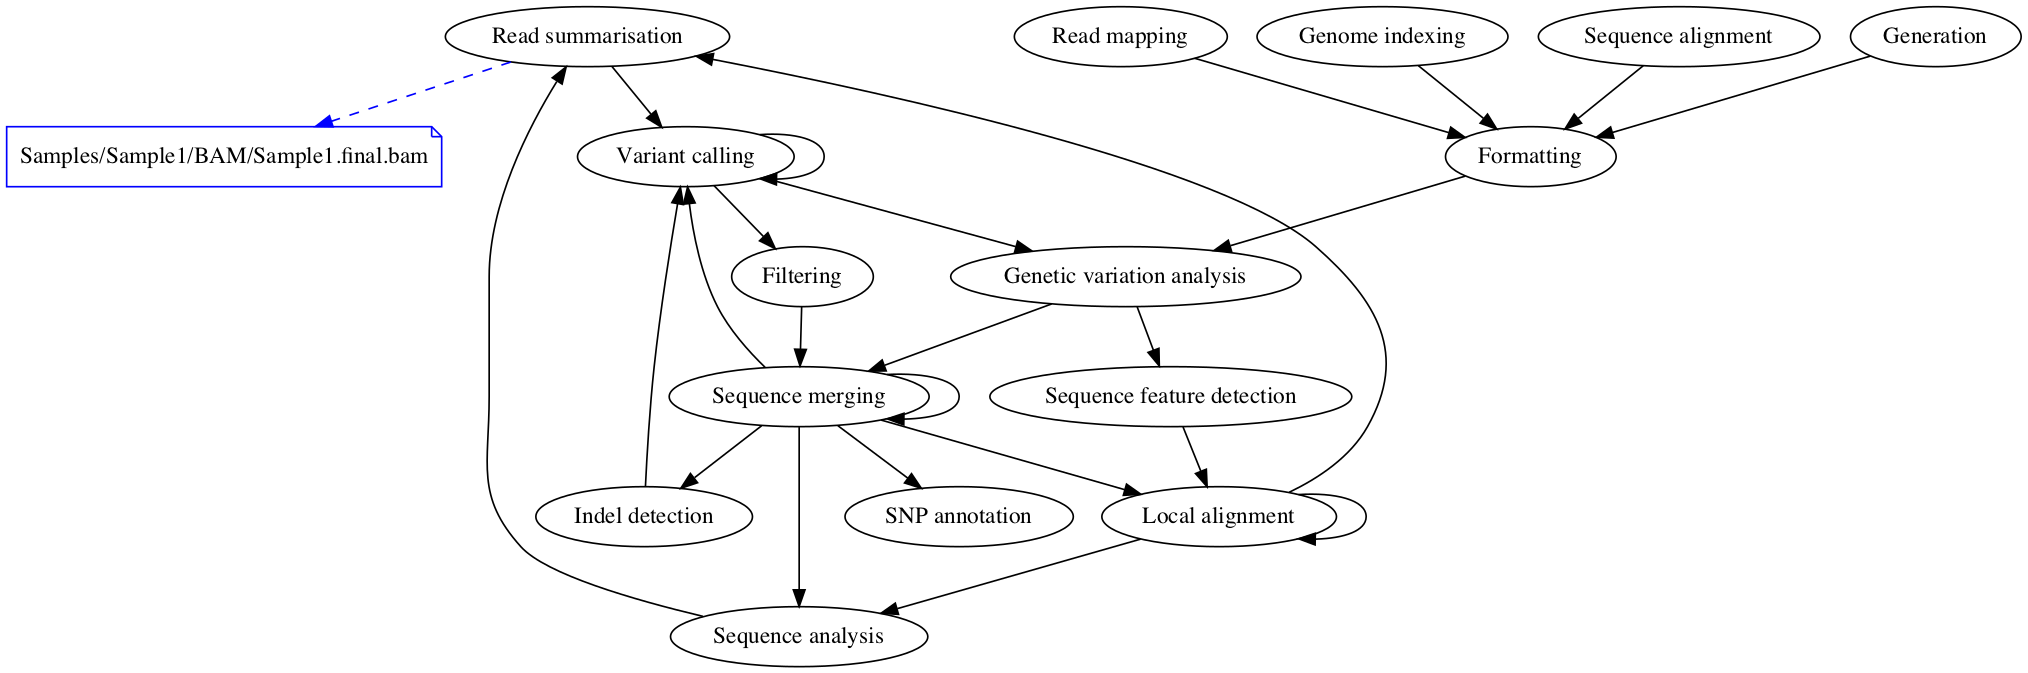

In [14]:
#%time draw(G, filename='plot.pdf', format='pdf')
%time draw(G, show='ipynb')

# Caracteristics of the captured provenance graph

### Size of the provenance graph

In [11]:
prov_graph = Graph()
prov_graph.bind('prov',Namespace('http://www.w3.org/ns/prov#'))
with io.open('provenance.ttl','r',encoding='utf8') as f:
    prov_graph.load(f, format='turtle')
print(str(len(prov_graph)) + " triples in the provenance graph")

555 triples in the provenance graph


### Distribution of PROV classes 

In [12]:
q_classes = "SELECT  ?class (COUNT(?s) AS ?count ) { ?s a ?class } GROUP BY ?class ORDER BY DESC(?count)"
results = prov_graph.query(q_classes)
md = """
| Class name | Number of instances |
|------|------|
""" 
for r in results :
    md = md + "|" + str(r['class']) + " | " + str(r['count']) + " | " + "\n"
display(Markdown(md))


| Class name | Number of instances |
|------|------|
|http://www.w3.org/ns/prov#Entity | 40 | 
|http://www.w3.org/ns/prov#Activity | 26 | 
|http://www.w3.org/ns/prov#Person | 1 | 
|http://www.w3.org/ns/prov#Agent | 1 | 
|http://www.w3.org/ns/prov#Bundle | 1 | 


### Distribution of PROV predicates

In [13]:
q_properties  = " SELECT  ?p (COUNT(?s) AS ?count ) { ?s ?p ?o } GROUP BY ?p ORDER BY DESC(?count)"
results = prov_graph.query(q_properties)
md = """
| Property name | Number of predicates |
|------|------|
""" 
for r in results :
    md = md + "|" + str(r['p']) + " | " + str(r['count']) + " | " + "\n"
display(Markdown(md))


| Property name | Number of predicates |
|------|------|
|http://www.w3.org/ns/prov#wasDerivedFrom | 167 | 
|http://www.w3.org/ns/prov#used | 100 | 
|http://www.w3.org/1999/02/22-rdf-syntax-ns#type | 69 | 
|http://www.w3.org/ns/prov#wasAssociatedWith | 65 | 
|http://www.w3.org/2000/01/rdf-schema#label | 39 | 
|http://www.w3.org/ns/prov#wasGeneratedBy | 39 | 
|http://www.w3.org/ns/prov#startedAtTime | 26 | 
|http://www.w3.org/ns/prov#endedAtTime | 26 | 
|http://www.w3.org/2000/01/rdf-schema#comment | 22 | 
|http://www.w3.org/ns/prov#generatedAtTime | 1 | 
|http://www.w3.org/ns/prov#wasAttributedTo | 1 | 
